<div style ="text-align:corner;font-size:23px;color:purple">**Name:Jayasurya V**</div><br>
<div style ="text-align:corner;font-size:23px;color:Blue">**Domain: Data Science and Business Analytics**</div>

<div style ="text-align:center;font-size:28px;color:Green">**Task-4 Exploratory Data Analysis - Terrorism**</div>

### Libraries

In [110]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [123]:
import warnings
warnings.simplefilter("ignore")

### Load dataset

In [124]:
data=pd.read_csv('E:\\backgrip\\Global Terrorism - START data\\globalterrorismdb.csv',encoding='latin1')

In [125]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Select particular Column

In [126]:
df=data.copy()

data=data[['iyear', 'imonth', 'iday','extended', 'country_txt', 
       'region_txt', 'city', 'success', 'suicide','nwound','nkill',
       'targtype1_txt', 'gname', 'weaptype1_txt']]
data.head()

,iyear,imonth,iday,extended,country_txt,region_txt,city,success,suicide,nwound,nkill,targtype1_txt,gname,weaptype1_txt
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,0.0,1.0,Private Citizens & Property,MANO-D,Unknown
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,0.0,0.0,Government (Diplomatic),23rd of September Communist League,Unknown
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,0.0,1.0,Journalists & Media,Unknown,Unknown
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,NaN,NaN,Government (Diplomatic),Unknown,Explosives
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,NaN,NaN,Government (Diplomatic),Unknown,Incendiary


In [127]:
data.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country_txt', 'region_txt',
       'city', 'success', 'suicide', 'nwound', 'nkill', 'targtype1_txt',
       'gname', 'weaptype1_txt'],
      dtype='object')

### Check null values or not

In [128]:
data.isnull().sum()

iyear                0
imonth               0
iday                 0
extended             0
country_txt          0
region_txt           0
city               434
success              0
suicide              0
nwound           16311
nkill            10313
targtype1_txt        0
gname                0
weaptype1_txt        0
dtype: int64

### drop null values

In [129]:
data.dropna(axis=0, inplace=True)

### Renaming columns

In [130]:
data.rename(columns={'iyear': 'year', 'imonth': 'month', 'iday':'day', 'country_txt':'country','attacktype1_txt':'attactype','nwound':'wound','nkill':'killed',
                  'region_txt':'region', 'targtype1_txt':'target', 'gname':'group', 'weaptype1_txt':'weapon'}, inplace=True)
data.head()

,year,month,day,extended,country,region,city,success,suicide,wound,killed,target,group,weapon
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,0.0,1.0,Private Citizens & Property,MANO-D,Unknown
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,0.0,0.0,Government (Diplomatic),23rd of September Communist League,Unknown
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,0.0,1.0,Journalists & Media,Unknown,Unknown
5,1970,1,1,0,United States,North America,Cairo,1,0,0.0,0.0,Police,Black Nationalists,Firearms
6,1970,1,2,0,Uruguay,South America,Montevideo,0,0,0.0,0.0,Police,Tupamaros (Uruguay),Firearms


In [131]:
data.columns

Index(['year', 'month', 'day', 'extended', 'country', 'region', 'city',
       'success', 'suicide', 'wound', 'killed', 'target', 'group', 'weapon'],
      dtype='object')

### Statistics 

In [132]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,164384.0,2003.174348,12.789087,1970.0,1991.0,2009.0,2014.0,2017.0
month,164384.0,6.481999,3.388046,0.0,4.0,6.0,9.0,12.0
day,164384.0,15.516644,8.807003,0.0,8.0,15.0,23.0,31.0
extended,164384.0,0.033069,0.178817,0.0,0.0,0.0,0.0,1.0
success,164384.0,0.882160,0.322419,0.0,1.0,1.0,1.0,1.0
suicide,164384.0,0.037248,0.189370,0.0,0.0,0.0,0.0,1.0
wound,164384.0,3.168788,36.048736,0.0,0.0,0.0,2.0,8191.0
killed,164384.0,2.133419,9.821208,0.0,0.0,0.0,2.0,1384.0


# Visualization 

### Number of Terrorist attack in year wise

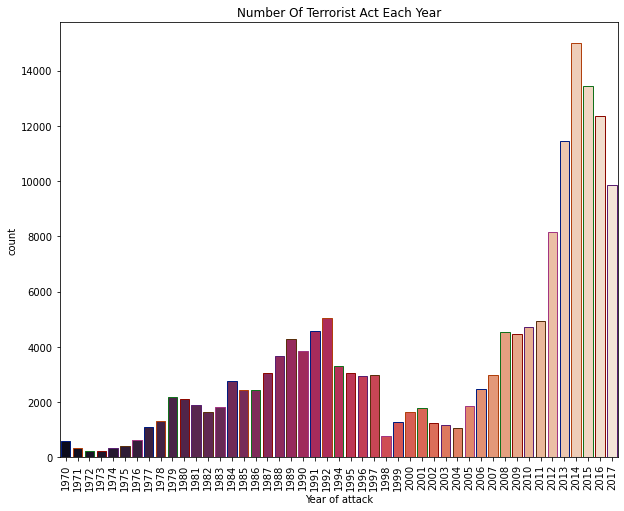

In [186]:
plt.subplots(figsize=(10,8))
sns.countplot('year',data=data,palette='rocket',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.xlabel('Year of attack')
plt.title('Number Of Terrorist Act Each Year')
plt.show()

### Neat graph in year wise

In [134]:
data['Decade'] = pd.cut(data['year'], bins=[1969, 1980, 1990, 2000, 2010, 2020], labels=['1970-1980', '1980-1990', '1990-2000', '2000-2010', '2010-2017'])
data[['year','Decade']].sample(10)

,year,Decade
8792,1979,1970-1980
48035,1991,1990-2000
106934,2012,2010-2017
176864,2017,2010-2017
96313,2010,2000-2010
105914,2012,2010-2017
53552,1992,1990-2000
80319,2006,2000-2010
121835,2013,2010-2017
115226,2013,2010-2017


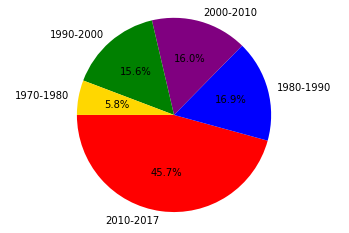

In [135]:
dec = data['Decade'].value_counts()

colors= 'red','blue','purple','green','gold'
plt.pie(dec,labels=dec.index,colors=colors,autopct='%1.1f%%', startangle=180)
plt.axis('equal')
plt.show()

### Number of Terrorist attack by region wise

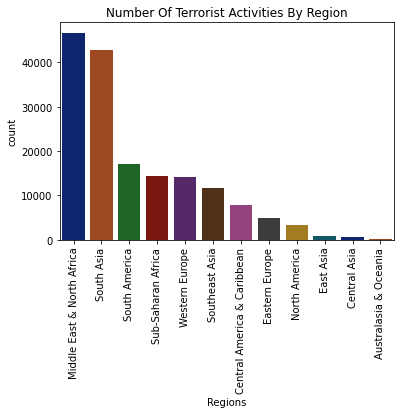

In [136]:
sns.countplot('region',data=data,palette='dark',order=data['region'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Regions')
plt.title('Number Of Terrorist Activities By Region')
plt.show()



### Which cities attack most time

In [184]:


def city_name(country=list(data['country'].unique())):
    a=data[data['country']==country]
    a=pd.DataFrame(a['city'].value_counts().iloc[1:10])
    return a.style.highlight_max(axis=0, color='red').highlight_min(axis=0, color='green')


In [185]:
city_name(data['country'])

,city
Baghdad,7374
Karachi,2571
Lima,2124
Mosul,2114
Mogadishu,1375
Santiago,1354
Belfast,1328
San Salvador,1254
Istanbul,1011


### Which weapons Maximum used by terrorist

In [139]:
def weapon_type(country=list(data['country'].unique())):
    a=data[data['country']==country]
    a=pd.DataFrame(a['weapon'].value_counts())
    return a.style.highlight_max(axis=0)


In [140]:
weapon_type(data['country'])

,weapon
Explosives,86231
Firearms,51645
Unknown,12083
Incendiary,10285
Melee,3381
Chemical,302
Sabotage Equipment,136
"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",133
Other,109
Fake Weapons,33


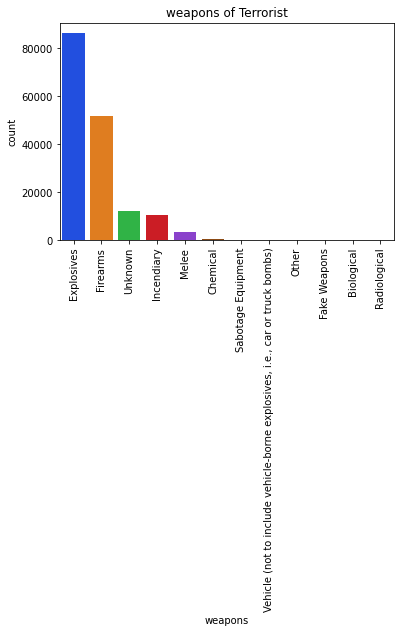

In [156]:
sns.countplot('weapon',data=data,palette='bright',order=data['weapon'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('weapons')
plt.title('weapons of Terrorist')
plt.show()

### What is target of Terrorist?

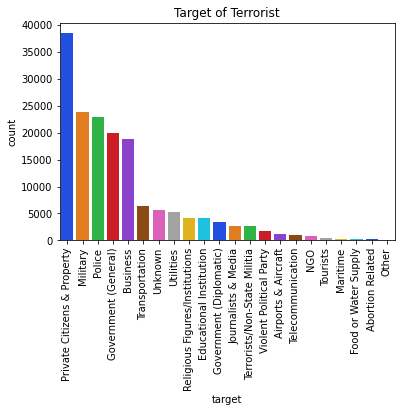

In [141]:
sns.countplot('target',data=data,palette='bright',order=data['target'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('target')
plt.title('Target of Terrorist')
plt.show()

### Which people highly affect

Text(0, 0.5, 'Wounded')

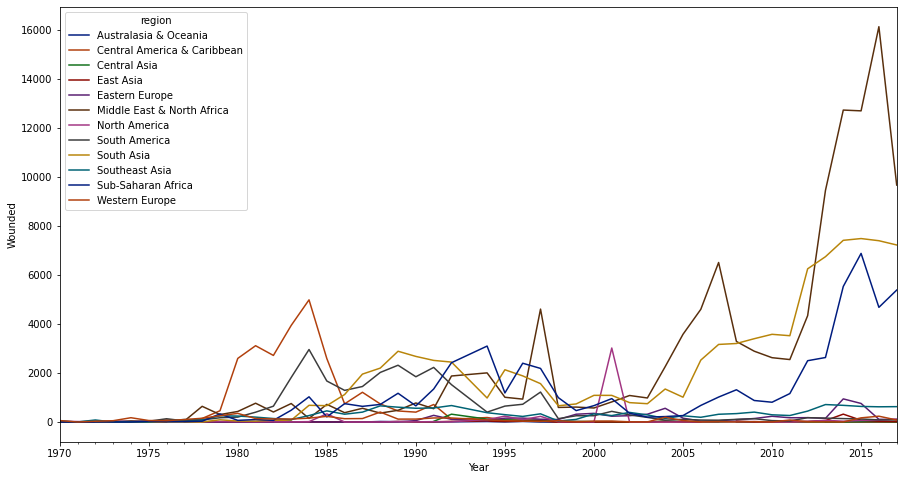

In [153]:
d=data.groupby(['year','region'])['killed'].sum()
plot_df = d.unstack('region').loc[:]
plot_df.index = pd.PeriodIndex(plot_df.index.tolist(),freq='A')
plot_df.plot(figsize=(15,8),color=sns.color_palette('dark',12))
plt.xlabel("Year")
plt.ylabel("Wounded")

### percentage of success and failure attacks

In [158]:
suc = data['success'].value_counts()
suc

1    145013
0     19371
Name: success, dtype: int64

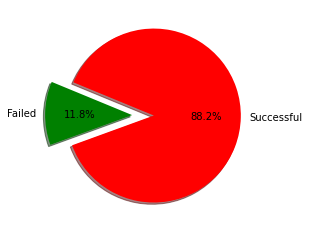

In [159]:
labels = 'Successful', 'Failed'

colors = ['red', 'green']
explode = (0.25, 0)
plt.pie(suc, labels=labels, explode=explode,colors=colors,autopct='%1.1f%%', shadow=True, startangle=200)
plt.show()

# Summarize:
<li>**2010-2017** year is highly attacked by terrorist
<li>**Middle East and North Africa** Region Mostly affect 
<li>In city wise **Baghdad** city highly affect
<li>In terrorist moslty **use Explosive, firearms **weapon but they **leastuse any biological and radiology**
<li>**Middle east and South Africa more people killed** by terrorist its is Hot zone
<li>**88.2% **terrorist plane success remain **11.8% **they plan failed</div>